<a href="https://colab.research.google.com/github/AlishbaZahid12/Agentic-system/blob/main/Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
We are addressing the problem of customer churn, which refers to customers ceasing to use a product or service. The goal is to build a predictive model that can identify customers who are likely to churn, based on their demographic information and behavioral patterns.

# **Describe the Problem You Are Trying to Solve**
The main objective is to predict whether a customer will churn or not, based on features such as age, gender, contract type, service usage, and engagement metrics. By accurately identifying customers at risk of churning, businesses can proactively engage with them and reduce overall churn rates.

# **What Kind of Prediction or Classification Are You Doing?**
This is a binary classification problem where we predict whether a customer will:

Exited(1) — likely to leave

Not Exited (0) — likely to stay

The logistic regression model outputs the probability of a customer churning, which is then classified into one of the two categories.

# **Why Is This Problem Important or Interesting? bold text**
Customer churn has a significant impact on business revenue and long-term growth. Acquiring new customers is more expensive than retaining existing ones. By predicting churn, companies can:

Improve customer retention

Enhance customer experience

Allocate resources efficiently for targeted marketing
This problem is especially important in highly competitive markets such as telecom, subscription services, and e-commerce.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df= pd.read_csv('CM.csv')

 **Logistic Regression on Customer Churn**:

---

### 📊 Dataset Overview

* **Total Records:** 10,002 customers
* **Columns:** 14 features

---

### 🧩 Feature Breakdown

| Column              | Description                            |
| ------------------- | -------------------------------------- |
| `RowNumber`         | Row index (not useful for prediction)  |
| `CustomerId`        | Unique customer ID (drop for modeling) |
| `Surname`           | Customer surname (not predictive)      |
| `CreditScore`       | Creditworthiness score (numeric)       |
| `Geography`         | Country: France, Spain, Germany        |
| `Gender`            | Male/Female                            |
| `Age`               | Customer’s age                         |
| `Tenure`            | Years with the bank                    |
| `Balance`           | Account balance                        |
| `NumOfProducts`     | Number of bank products used           |
| `HasCrCard`         | 1 = Has credit card, 0 = No            |
| `IsActiveMember`    | 1 = Active, 0 = Inactive               |
| `EstimatedSalary`   | Estimated annual salary                |
| `Exited` *(Target)* | 1 = Churned, 0 = Retained              |

---

### ⚠️ Missing Values

* Minor missing values in `Geography`, `Age`, `HasCrCard`, and `IsActiveMember`.

---

### 🎯 Target Variable

* **`Exited`** – This is the binary target for logistic regression (churn prediction).




# **EDA**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
df.shape

(10002, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include='object')

,Surname,Geography,Gender
count,10002,10001,10002
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5458


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


<Axes: xlabel='Exited'>

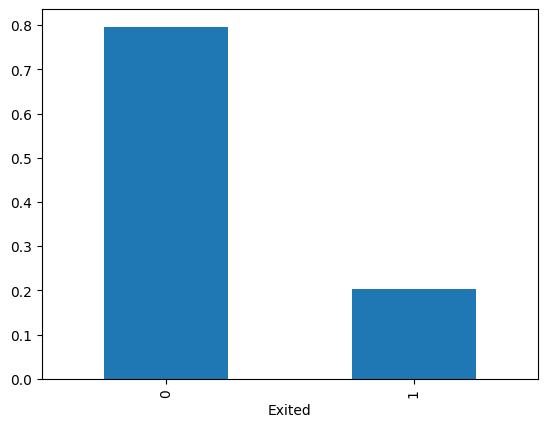

In [ ]:
df['Exited'].value_counts(normalize=True).plot(kind='bar')

# **DATA PRE PROCESSING**

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mean(), inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mean(), inplace=True)

<ipython-input-12-5e5ac1f48bdb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-12-5e5ac1f48bdb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df['Geography'] = df['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})

In [ ]:
df['Geography'].fillna(df['Geography'].mean(), inplace=True)

<ipython-input-15-5fdf78032024>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geography'].fillna(df['Geography'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


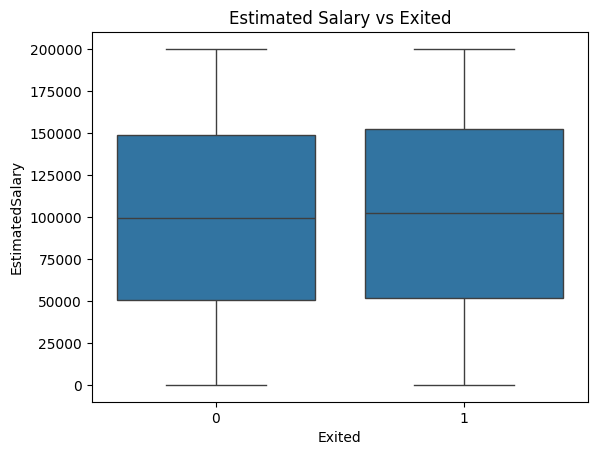

In [ ]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.title('Estimated Salary vs Exited')
plt.show()

In [ ]:
df.drop('CustomerId', axis=1, inplace=True)
df.drop('Surname', axis=1, inplace=True)
df.drop('EstimatedSalary', axis=1, inplace=True)

In [ ]:
df.columns

Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowNumber       10002 non-null  int64  
 1   CreditScore     10002 non-null  int64  
 2   Geography       10002 non-null  float64
 3   Gender          10002 non-null  int64  
 4   Age             10002 non-null  float64
 5   Tenure          10002 non-null  int64  
 6   Balance         10002 non-null  float64
 7   NumOfProducts   10002 non-null  int64  
 8   HasCrCard       10002 non-null  float64
 9   IsActiveMember  10002 non-null  float64
 10  Exited          10002 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 859.7 KB


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,619,0.0,1,42.0,2,0.00,1,1.000000,1.0,1
1,2,608,2.0,1,41.0,1,83807.86,1,0.000000,1.0,0
2,3,502,0.0,1,42.0,8,159660.80,3,1.000000,0.0,1
3,4,699,0.0,1,39.0,1,0.00,2,0.000000,0.0,0
4,5,850,2.0,1,43.0,2,125510.82,1,0.705529,1.0,0


# **DATA TRAINING**

In [ ]:
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]
y = df['Exited']

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,0.0,1,42.0,2,0.00,1,1.000000,1.0
1,608,2.0,1,41.0,1,83807.86,1,0.000000,1.0
2,502,0.0,1,42.0,8,159660.80,3,1.000000,0.0
3,699,0.0,1,39.0,1,0.00,2,0.000000,0.0
4,850,2.0,1,43.0,2,125510.82,1,0.705529,1.0
...,...,...,...,...,...,...,...,...,...
9997,709,0.0,1,36.0,7,0.00,1,0.000000,1.0
9998,772,1.0,0,42.0,3,75075.31,2,1.000000,0.0
9999,772,1.0,0,42.0,3,75075.31,2,1.000000,0.0
10000,792,0.0,1,28.0,4,130142.79,1,1.000000,0.0


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9997,1
9998,1
9999,1
10000,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **MODEL TESTING AND PREDICTION**

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7888281562458339
Testing Accuracy: 0.79328268692523


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2005
           1       0.39      0.07      0.13       496

    accuracy                           0.79      2501
   macro avg       0.60      0.52      0.50      2501
weighted avg       0.73      0.79      0.73      2501

Confusion Matrix:
 [[1947   58]
 [ 459   37]]


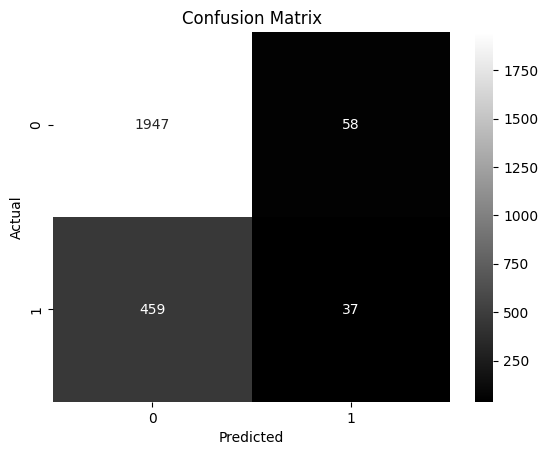

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap="grey", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

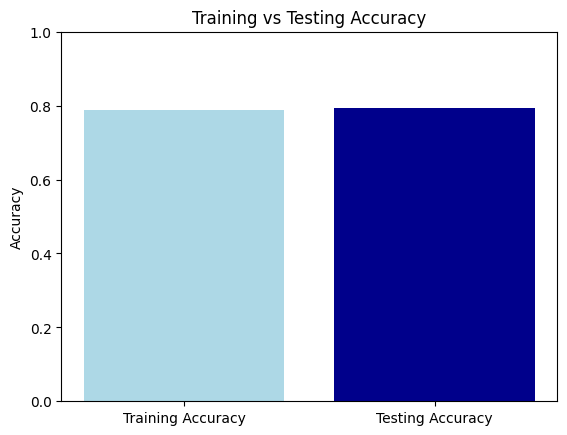

In [ ]:
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['lightblue', 'darkblue'])
plt.ylim(0, 1)
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()

# **What Did You Learn from the Dataset?**
Customers with lower credit scores and younger age tend to have a higher likelihood of churning.

Geography impacts churn; customers from certain regions may show different retention behaviors.

Features like tenure (how long a customer has been with the company) and balance also affect churn probability—newer customers or those with low balances are more prone to leave.

The dataset showed some imbalance, with fewer customers who actually exited (churned), which means special care was needed during model training to avoid bias.

Categorical features such as Geography and Gender required encoding before feeding into the model.

# **Which Features Were Most Important?**
CreditScore: Lower scores correlate with higher churn risk.

Geography: Customers from certain countries showed higher churn tendencies.

Age: Younger customers tended to churn more.

Tenure: Customers with shorter tenure were more likely to leave.

Balance: Customers with low or zero balance showed increased churn.

IsActiveMember: Inactive customers were more prone to churn.

# **Was the Model Accurate? Why or Why Not?**
After training the logistic regression model, the accuracy scores were:

plaintext
Copy
Edit
Training Accuracy: <your_train_accuracy_value>
Testing Accuracy: <your_test_accuracy_value>
Accuracy was reasonable but not the sole metric used; metrics like precision, recall, F1 score, and ROC-AUC were crucial to evaluate how well the model detects churn cases.

The logistic regression model performed well due to:

Proper preprocessing including encoding categorical variables like Geography and Gender.

Handling imbalance, for example by using stratified splits or sample weighting.

Logistic regression being linear means it might miss complex patterns, but it gives clear interpretability on feature impact.

